## 12-2. 파이썬으로 그래프를 그린다는건?

### 준비물
- Pandas, Matplotlib, Seaborn 등 여러 가지 시각화 라이브러리
- Matplotlib와 Seaborn 역시 Pandas와 동일하게 pip을 이용해 설치
- **pip install matplotlib**
- **pip install seaborn**

### 파이썬으로 그래프를 그린다는건?
- 도화지를 펼치고 축을 그리고 그 안에 데이터를 그리는 작업

**Ex**

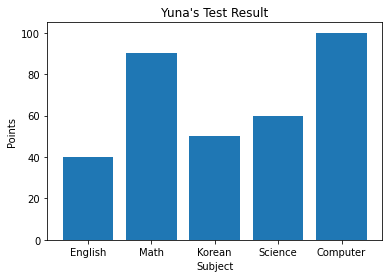

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

#그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

# 보여주기
plt.savefig('./barplot.png')  # 그래프를 이미지로 출력
plt.show()                            # 그래프를 화면으로 출력

---

## 12-3. 간단한 그래프 그리기 (1) 막대그래프 그려보기

### 1. 데이터 정의

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

### 2. 축 그리기

**그래프 그리는 순서**
1. 하나의 그림(figure)객체 만들기
2. 그 안에 하위 그래프(subplot) 추가   
=> 도화지에 축을 그리는 과정

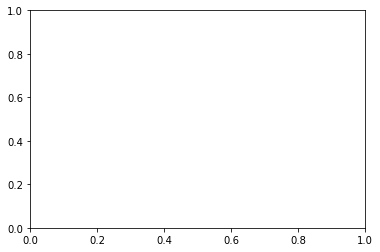

In [4]:
# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

In [5]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

- 축이 없어 그려지는 건 없지만 figure 객체 생성
- figure()라는 객체는 도화지(그래프)
- 이 객체에 **add_subplot** 메소드 이용해 축 그려줌
- figsize 인자값 주어 그래프의 크기 정할 수 있음

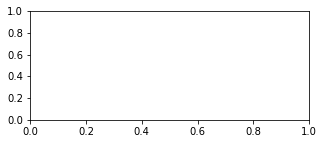

In [6]:
fig = plt.figure(figsize=(5,2))
ax1 = fig.add_subplot(1,1,1)

- 도화지 안에 축 여러 개 그릴 수 있음
- = 그래프 여러 개 그릴 수 있음
- **add_subplot**의 인자 조정

**그래프 몇 개 추가**

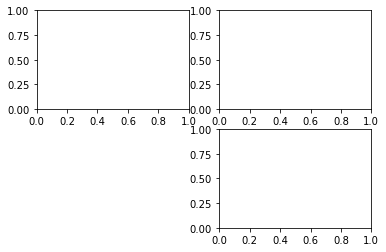

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,4)

- fig.add_subplot(2,2,1) => (2,2)는 2행 2열로 총 4개의 그래프 그릴 수 있음

### 3. 그래프 그리기

- **bar()** 메소드 이용하여 막대그래프 그림
- 인자에 위에서 정의한 데이터들 x, y 순으로 넣어 줌

<BarContainer object of 5 artists>

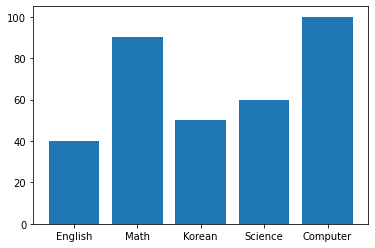

In [8]:
#그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject,points)

### 4. 그래프 요소 추가

**label, title**
- x, y라벨 제목을 추가하기 위해 **xlabel()** 메소드와 **ylabel()** 메소드 **title()** 메소드 이용

Text(0.5, 1.0, "Yuna's Test Result")

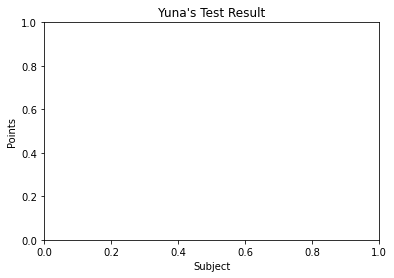

In [9]:
plt.xlabel('Subject')  
plt.ylabel('Points')  
plt.title("Yuna's Test Result")  

**전체 그래프 그리기 코드 완성**

Text(0.5, 1.0, "Yuna's Test Result")

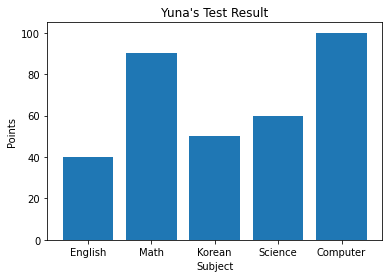

In [10]:
#그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject,points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

---

## 12-4. 간단한 그래프 그리기 (2) 선 그래프 그려보기
- matplotlib을 이용해 선(line) 그래프를 그림

### 1. 데이터 정의
- 출처: https://finance.yahoo.com/quote/AMZN/history?p=AMZN   

In [11]:
# 터미널에서 아래 명령어 실행하여 다운로드

# $ mkdir -p ~/aiffel/data_represent/data
# $ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/AMZN.csv
# $ mv AMZN.csv ~/aiffel/data_represent/data

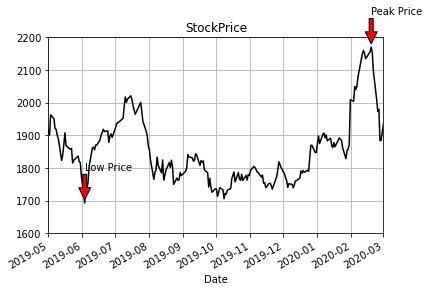

In [12]:
from datetime import datetime
import pandas as pd
import os

#그래프 데이터 
csv_path = os.getenv("HOME") + "/aiffel/data_represent/data/AMZN.csv"
data = pd.read_csv(csv_path ,index_col=0, parse_dates=True)
price = data['Close']

# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600,2200])
plt.xlim(['2019-05-01','2020-03-01'])

# 주석달기
important_data = [(datetime(2019, 6, 3), "Low Price"),(datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10), 
                xytext=(d,price.asof(d)+100),
                arrowprops=dict(facecolor='red'))

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

**Pandas Series 데이터 활용**
- pansdas의 Series는 선 그래프 그리기 최적의 자료구조 갖춤
- 위 코드 중 **price = data['Close']** => Pandas의 Series
- 위 코드 중 **price.plot(ax=ax, style='black')**에서 Pandas의 plot 사용하면서 matplotlib에서 정의한 subplot 공간 **ax**를 사용      
<br/>    
**좌표측 설정**
- **plt.xlim(), plt.ylim()**을 통해 x, y 좌표축의 적당한 범위를 설정
<br/>   
**주석**
- 그래프 안에 주석: **annotate()** 메소드 이용
<br/>   
**그리드**
- 그리드(격자눈금) 추가: **grid()** 메소드 이용 

## 12-5. 간단한 그래프 그리기 (3) plot 사용법 상세

### plt.plot()로 그래프 그리기
- **step 1.** figure()객체를 생성
- **step 2.** add_subplot()으로 서브 플롯을 생성하며 plot 그림
<br/>    
**2가지 과정 생략 가능**   
-  plt.plot()명령으로 그래프를 그리면 matplotlib은 가장 최근의 figure객체와 그 서브플롯을 그림
- **If** 서브플롯이 없으면 서브플롯 하나를 생성

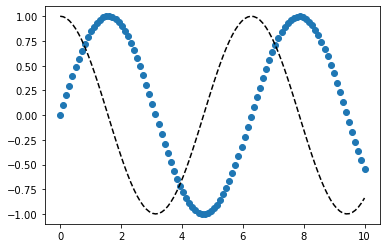

In [13]:
import numpy as np
x = np.linspace(0, 10, 100) 
plt.plot(x, np.sin(x),'o')
plt.plot(x, np.cos(x),'--', color='black') 
plt.show()

- **plt.plot()**의 인자로 x데이터, y데이터, 마커옵션, 색상 등의 인자를 이용

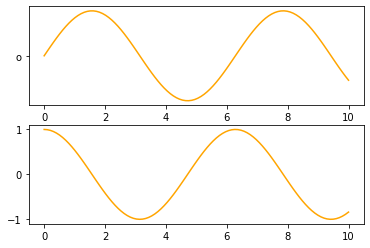

In [14]:
x = np.linspace(0, 10, 100) 

plt.subplot(2,1,1)
plt.plot(x, np.sin(x),'orange','o')

plt.subplot(2,1,2)
plt.plot(x, np.cos(x), 'orange') 
plt.show()

- 서브 플롯도 **plt.subplot**을 이용해 추가할 수 있음

### linestyle, marker 옵션
- **linestyle**은 plot()의 인자로 들어감
- 아래와 같이 다양하게 표기 가능

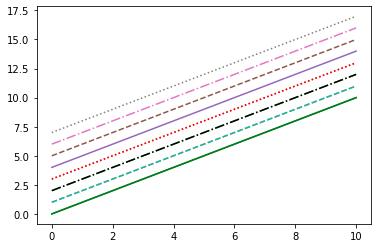

In [15]:
x = np.linspace(0, 10, 100) 

plt.plot(x, x + 0, linestyle='solid') 
plt.plot(x, x + 1, linestyle='dashed') 
plt.plot(x, x + 2, linestyle='dashdot') 
plt.plot(x, x + 3, linestyle='dotted')
plt.plot(x, x + 0, '-g') # solid green 
plt.plot(x, x + 1, '--c') # dashed cyan 
plt.plot(x, x + 2, '-.k') # dashdot black 
plt.plot(x, x + 3, ':r'); # dotted red
plt.plot(x, x + 4, linestyle='-') # solid 
plt.plot(x, x + 5, linestyle='--') # dashed 
plt.plot(x, x + 6, linestyle='-.') # dashdot 
plt.plot(x, x + 7, linestyle=':'); # dotted

### Pandas로 그래프 그리기
- **pandas**도 **plot()** 메소드를 통해 여러가지 그래프 그리기 가능
- **matplotlib**과 연계 사용   
<br/>   
**pandas.plot메서드 인자**
- label: 그래프의 범례이름.
- ax: 그래프를 그릴 matplotlib의 서브플롯 객체.
- style: matplotlib에 전달할 'ko--'같은 스타일의 문자열
- alpha: 투명도 (0 ~1)
- kind: 그래프의 종류: line, bar, barh, kde
- logy: Y축에 대한 로그스케일
- use_index: 객체의 색인을 눈금 이름으로 사용할지의 여부
- rot: 눈금 이름을 로테이션(0 ~ 360)
- xticks, yticks: x축, y축으로 사용할 값
- xlim, ylim: x축, y축 한계
- grid: 축의 그리드 표시할 지 여부    
<br/>      
**pandas의 data가 DataFrame일때 plot 메서드 인자**
- subplots: 각 DataFrame의 칼럼을 독립된 서브플롯에 그린다.
- sharex: subplots=True면 같은 X축을 공유하고 눈금과 한계를 연결한다.
- sharey: subplots=True면 같은 Y축을 공유한다.
- figsize: 그래프의 크기, 튜플로 지정
- title: 그래프의 제목을 문자열로 지정
- sort_columns: 칼럼을 알파벳 순서로 그린다.

**Ex. 막대그래프**
- kind에 **bar** 옵션을 주어 그리기 가능

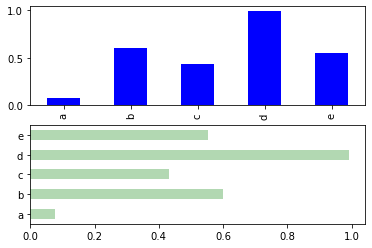

In [16]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(5), index=list('abcde'))
data.plot(kind='bar', ax=axes[0], color='blue', alpha=1)
data.plot(kind='barh', ax=axes[1], color='green', alpha=0.3)

**Ex. 선 그래프**

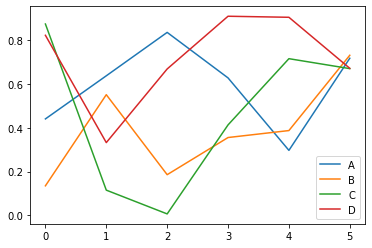

In [17]:
df = pd.DataFrame(np.random.rand(6,4), columns=pd.Index(['A','B','C','D']))
df.plot(kind='line')

----

## 12-6. 간단한 그래프 그리기 (4) 정리해 보자

### 6. 정리
- **step 1.** fig = plt.figure(): figure 객체를 선언해 '도화지를 펼쳐' 줍니다.
- **step 2.** ax1 = fig.add_subplot(1,1,1) : 축을 그립니다.
- **step 3.** ax1.bar(x, y) 축안에 어떤 그래프를 그릴지 메소드를 선택한 다음, 인자로 데이터를 넣어줍니다.
- **step 4.** 그래프 타이틀 축의 레이블 등을 plt의 여러 메소드 grid, xlabel, ylabel 을 이용해서 추가해주고
- **step 5.** plt.savefig 메소드를 이용해 저장해 줍니다.

=> 파이썬 기반의 시각화 라이브러리 **pandas, Matplotlib, Seaborn** 모두 이런 식으로 그래프를 그림

-----

## 12-7. 그래프 4대 천왕 (1) 데이터 준비
- 앞전에는 그래프 그래는 방법을 배움
- 이번에는 자주 사용되는 그래프 연습

### 데이터 준비

**1) 데이터 불러오기**
- Seaborn의 **load_dataset()** 메소드를 이용하면 API를 통해 손쉽게 유명한 예제 데이터를 다운로드 가능

**연습용 csv파일**
- https://github.com/mwaskom/seaborn-data


In [18]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")

- tips 데이터: 종업원들이 tip을 얼마나 받았는지에 대한 데이터가 있는 파일
- 출처: https://github.com/mwaskom/seaborn-data/blob/master/tips.csv

**2) 데이터 살펴보기(EDA: Exploratory Data Analysis)**

In [19]:
df = pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
df.shape

(244, 7)

In [21]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


- 본 데이터는 결측 값이 없음
**데이터 변수 중**
- **범주형(category) 데이터**: sex, smoker, day, time
- **수치형(numerica) 데이터**: tips, total_bill, size

=> **size** 데이터는 테이블 인원이므로 **범주형 데이터**로 봄

**범주형 변수의 카테고리별 개수 확인**

In [23]:
print(df['sex'].value_counts())
print("===========================")


print(df['time'].value_counts())
print("===========================")


print(df['smoker'].value_counts())
print("===========================")


print(df['day'].value_counts())
print("===========================")


print(df['size'].value_counts())
print("===========================")

Male      157
Female     87
Name: sex, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64


----

## 12-8. 그래프 4대 천왕 (2) 범주형 데이터

### 범주형 데이터
- 주로 **막대 그래프** 사용
- 가로, 세로, 누적, 그룹화된 **막대 그래프** 사용

**1) 막대 그래프(bar graph)**
- **pandas와 Matplotlib를 활용한 방법**

In [24]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**tip 컬럼을 성별에 대한 평균으로 나타내기**
- pandas의 groupby 메소드 활용

In [25]:
grouped = df['tip'].groupby(df['sex'])

- **code 해석**: **df.['tip']** 컬럼을 **groupby()** 한다는 의미. 
- 인자는 **sex**를 넣어 줌

In [26]:
grouped.mean() # 성별에 따른 팁의 평균

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [27]:
grouped.size() # 성별에 따른 데이터 량 (팁 횟수)

sex
Male      157
Female     87
Name: tip, dtype: int64

No handles with labels found to put in legend.


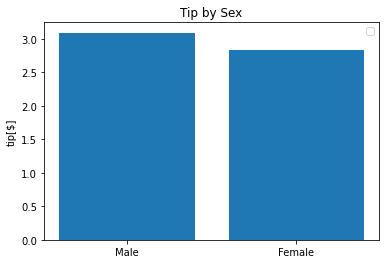

In [28]:
import numpy as np
sex = dict(grouped.mean())
x = list(sex.keys())
y = list(sex.values())

plt.bar(x, y)
plt.ylabel('tip[$]')
plt.title('Tip by Sex')
plt.legend()

**Seaborn과 Matplotlib을 활용한 간단한 방법**
- **Seaborn**을 이용하면 더 쉽게 표현 가능
- **sns.barplot()** 메소드 이용

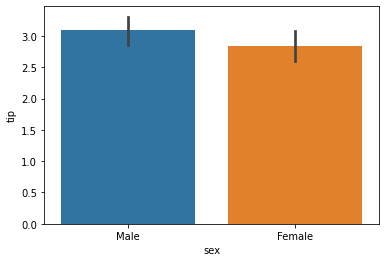

In [29]:
sns.barplot(data=df, x='sex', y='tip')

- **Matplot**과 함께 사용하여 **figsize, title**을 정하는 등 그래프에 다양한 옵션 추가 가능

Text(0.5, 1.0, 'Tip by sex')

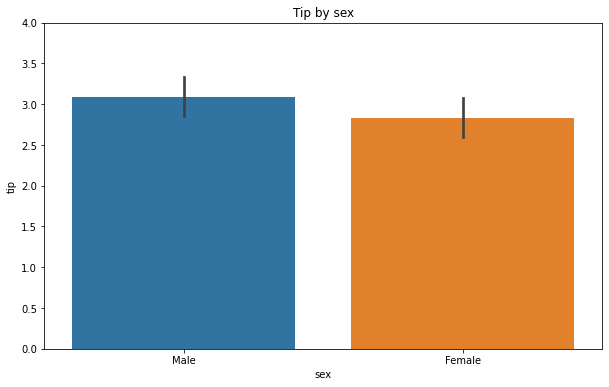

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='sex', y='tip')
plt.ylim(0, 4)
plt.title("Tip by sex")

**요일에 따른 tip 바 그래프**

Text(0.5, 1.0, 'Tip by day')

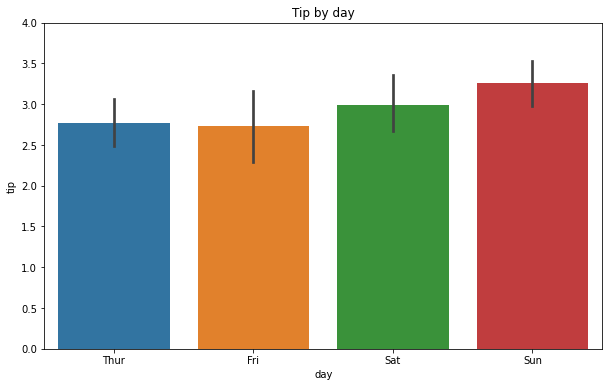

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='day', y='tip')
plt.ylim(0, 4)
plt.title("Tip by day")

**Subplot을 활용하여 범주형 그래프에 Violineplot을 사용할 수 있음**
- **palette** 옵션으로 다양한 색상 사용 가능

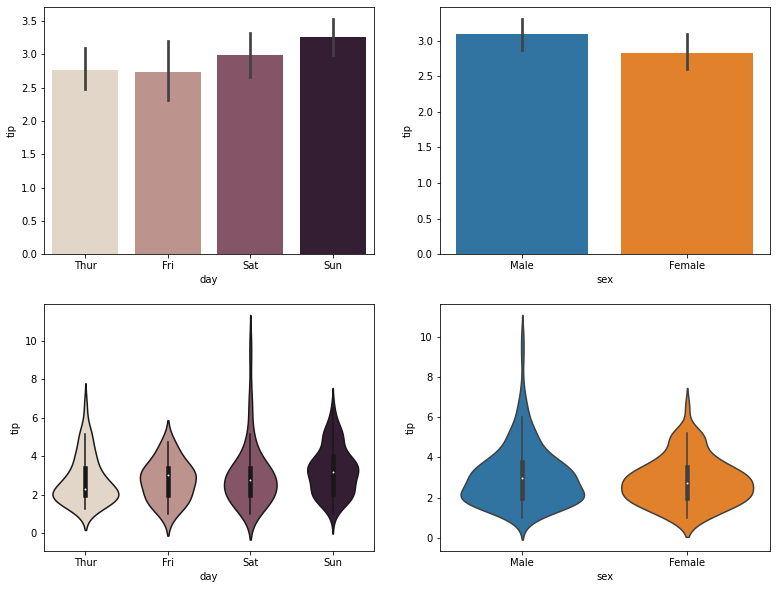

In [32]:
fig = plt.figure(figsize=(13,10))
ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x='day', y='tip', palette='ch:.25')
ax2 = fig.add_subplot(2,2,2)
sns.barplot(data=df, x='sex', y='tip')
ax3 = fig.add_subplot(2,2,4)
sns.violinplot(data=df, x='sex', y='tip')
ax3 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x='day', y='tip',palette="ch:.25")

**catplot을 사용하여 나타내기**

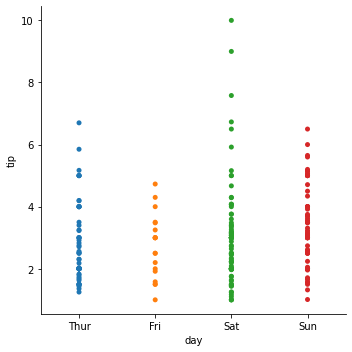

In [33]:
sns.catplot(x='day', y='tip', jitter=False, data=tips)

----

## 12-9. 그래프 4대 천왕 (3) 수치형 데이터

### 수치형 데이터
- **산점도, 선 그래프**는 수치형 데이터에 나타나기 좋은 그래프

**2) 산점도(scatter plot)**
- **hue**인자에 **'day'**를 주어 요일(day)에 따른 **tip**과 **total_bill**의 관계 시각화

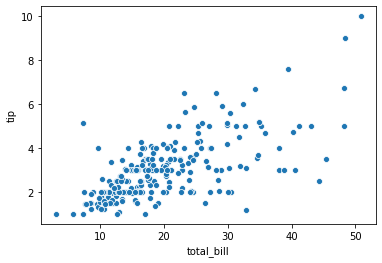

In [34]:
sns.scatterplot(data=df, x='total_bill', y='tip', palette="ch:r=-.2, d=.3_r")



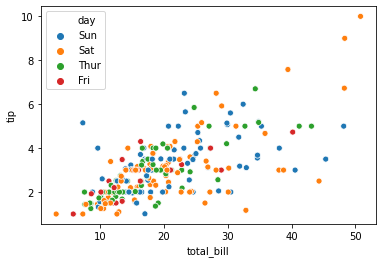

In [35]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='day')

**3) 선 그래프(line graph)**
- plot의 기본은 **선 그래프**
- tips 예제로는 선 그래프 설명이 어려우니 실전 예제 풀면서 다룰 예정

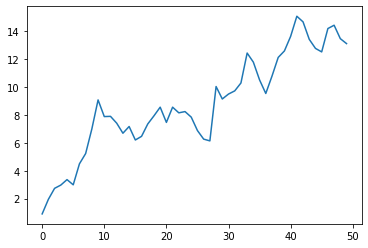

In [36]:
plt.plot(np.random.randn(50).cumsum())

**step-5에서 설명한 예제 그래프도 선 그래프임**

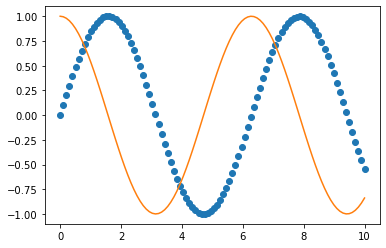

In [37]:
x = np.linspace(0,10,100)
plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x))
plt.show()

**Seaborn으로도 활용 가능**

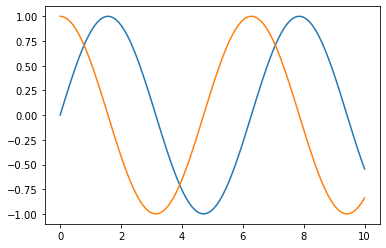

In [38]:
sns.lineplot(x, np.sin(x))
sns.lineplot(x, np.cos(x))

**4) 히스토그램**
- **히스토그램**: 도수분포표를 그래프로 나타낸 것
- 가로축
    - 계급: 변수의 구간, bin (or bucket)
- 세로축
    - 도수: 빈도수, frequency
- 전체 총량: n

**Ex. 히스토그램 만들기**
- x1과 x2의 평균은 100, 130
- 도수를 50개의 구간으로 표시하며, 확률 밀도가 아닌 빈도로 표기

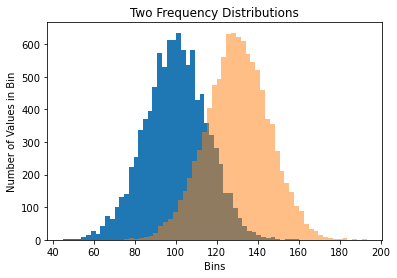

In [39]:
#그래프 데이터 
mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
patches = ax1.hist(x1, bins=50, density=False)
patches = ax1.hist(x2, bins=50, density=False, alpha=0.5)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')

# 보여주기
plt.show()

### 에제 데이터의 히스토그램
- **tips** 데이터 활용
- **tips** 데이터의 **total_bill**과 **tips**에 대해 히스토그램 그리기

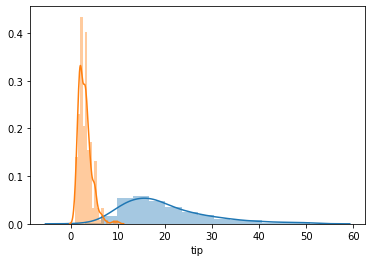

In [40]:
sns.distplot(df['total_bill'])
sns.distplot(df['tip'])

**전체 결제 금액 대비 팁의 비율 히스토그램**

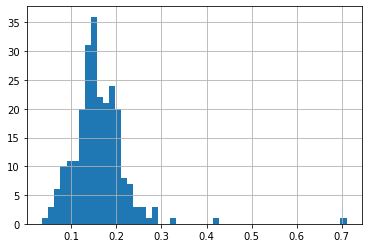

In [41]:
df['tip_pct'] = df['tip']/df['total_bill']
df['tip_pct'].hist(bins=50)

**kind='kde'**로 확률 밀도 그래프 
- **밀도 그래프**: 연속된 확률분포 나타냄
    - 일반적으로는 kernels메서드를 섞어서 이 분포를 근사하는 식으로 그립니다.
    - 이것은 우리에게 친숙한 함수로는 좀 더 단순한 정규분포(가우시안)로 나타낼 수 있습니다.
    - 밀도 그래프는 KDE(Kernel Density Estimate) 커널 밀도 추정 그래프입니다.

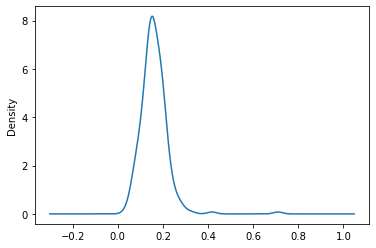

In [42]:
df['tip_pct'].plot(kind='kde')

**그래프 대표 4개**
- 막대 그래프(bar graph)
- 선 그래프(line graph)
- 산점도(scatter plot)
- 히스토그램(histogram)

----

## 12-10. 시계열 데이터 시각화하기

**Ex.**
- 1949~1960년도별 탑승객 시계열 데이터

**1. 데이터 가져오기**

In [43]:
csv_path = os.getenv("HOME") + "/aiffel/data_represent/data/flights.csv"
data = pd.read_csv(csv_path)
flights = pd.DataFrame(data)
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


- 연도의 각 달별로 탑승객 수를 보여줌

**2. 그래프 그리기**

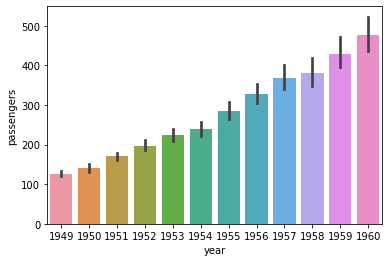

In [44]:
sns.barplot(data=flights, x='year', y='passengers')

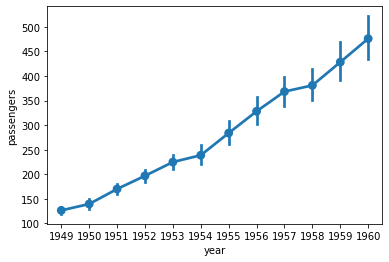

In [45]:
sns.pointplot(data=flights, x='year', y='passengers')

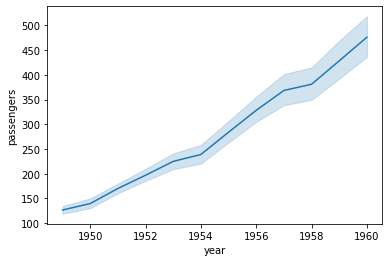

In [46]:
sns.lineplot(data=flights, x='year', y='passengers')

달별로 나누어 보기 위해 **hue** 인자에 **'month'** 할당

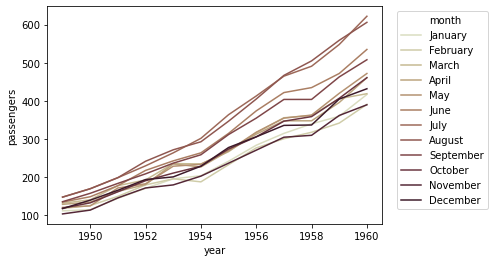

In [47]:
sns.lineplot(data=flights, x='year', y='passengers', hue='month', palette='ch:.50')
plt.legend(bbox_to_anchor=(1.03,1), loc=2)
#legend 그래프 밖에 추가하기


**히스토그램**

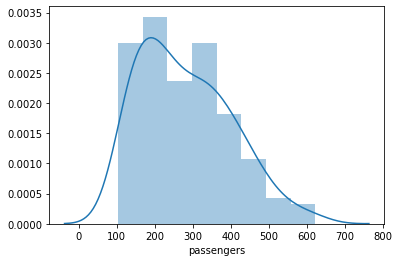

In [48]:
sns.distplot(flights['passengers'])

----

## 12-11. Heatmap

### Heatmap
- **Heatmap**은 방대한 양의 데이터와 현상을 수치에 따른 색상으로 나타내는 것
- 데이터 차원에 대한 제한은 없으나 모두 2차원으로 시각화하여 표현


- 예제 데이터의 연도와 달에 대해 탑승객 수를 heatmap으로 나타냄

- Heatmap을 그리기 위해 데이터를 pivot해야 함
- **pivot**: 어떤 축, 점을 기준으로 바꾸는 것
- **pandas**의 **dataframe**의 **pivot()** 메소드 사용

In [51]:
pivot = flights.pivot(index='year', columns='month', values='passengers')
pivot

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


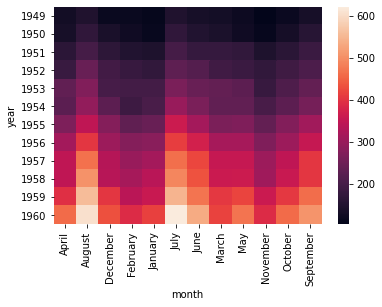

In [52]:
sns.heatmap(pivot)

**다양한 옵션**

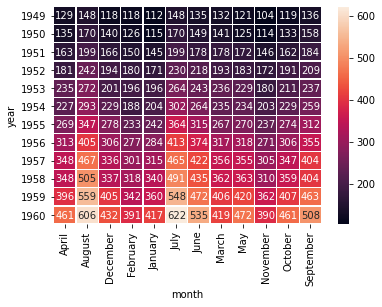

In [53]:
sns.heatmap(pivot, linewidths=.2, annot=True, fmt="d")

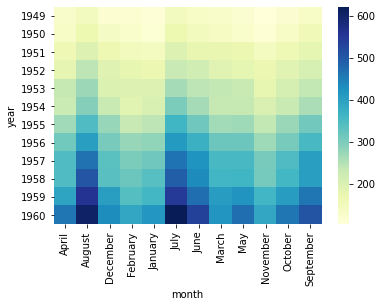

In [56]:
sns.heatmap(pivot, cmap="YlGnBu")